In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ibd = pd.read_csv("plink.genome", sep='\s+')
ibd

/home/shussain/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,FID1,IID1,FID2,IID2,RT,EZ,Z0,Z1,Z2,PI_HAT,PHE,DST,PPC,RATIO
0,1,9239944155_R01C01,2,9239944155_R02C01,UN,NaN,1.0000,0.0000,0.0000,0.0000,0,0.684815,0.0786,0.0
1,1,9239944155_R01C01,3,9239944155_R03C01,UN,NaN,1.0000,0.0000,0.0000,0.0000,0,0.689668,0.7603,NaN
2,1,9239944155_R01C01,4,9239944155_R04C01,UN,NaN,1.0000,0.0000,0.0000,0.0000,0,0.679960,0.7603,NaN
3,1,9239944155_R01C01,5,9239944155_R05C01,UN,NaN,1.0000,0.0000,0.0000,0.0000,0,0.684674,0.7603,NaN
4,1,9239944155_R01C01,6,9239944155_R06C01,UN,NaN,1.0000,0.0000,0.0000,0.0000,-1,0.689462,0.0786,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68260,1,131,1,250,OT,0.0,1.0000,0.0000,0.0000,0.0000,1,0.696363,0.7603,NaN
68261,1,131,1,247,OT,0.0,1.0000,0.0000,0.0000,0.0000,0,0.694976,0.7603,NaN
68262,1,132,1,250,PO,0.5,0.0076,0.9003,0.0921,0.5423,1,0.832249,0.7603,NaN
68263,1,132,1,247,PO,0.5,0.1148,0.8091,0.0762,0.4807,0,0.817557,0.7603,NaN


In [4]:
related = ibd.query("EZ > 0")
related

,FID1,IID1,FID2,IID2,RT,EZ,Z0,Z1,Z2,PI_HAT,PHE,DST,PPC,RATIO
52512,1,23,1,24,FS,0.500,0.2838,0.5022,0.2140,0.4651,1,0.824352,0.7603,NaN
52515,1,23,1,98,OT,0.125,0.8289,0.1110,0.0601,0.1156,1,0.736238,0.0786,0.0
52516,1,23,1,96,OT,0.125,0.8196,0.1399,0.0405,0.1105,0,0.733658,0.0786,0.0
52517,1,23,1,90,OT,0.125,0.7561,0.2051,0.0388,0.1413,1,0.740302,0.0786,0.0
52518,1,23,1,93,OT,0.125,0.7712,0.2110,0.0178,0.1233,1,0.734787,0.0786,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68238,1,303,1,37,OT,0.125,0.8303,0.1635,0.0062,0.0880,0,0.726170,0.7603,NaN
68244,1,304,1,37,OT,0.125,0.8195,0.1764,0.0041,0.0923,0,0.726972,0.7603,NaN
68262,1,132,1,250,PO,0.500,0.0076,0.9003,0.0921,0.5423,1,0.832249,0.7603,NaN
68263,1,132,1,247,PO,0.500,0.1148,0.8091,0.0762,0.4807,0,0.817557,0.7603,NaN


<AxesSubplot:xlabel='PI_HAT', ylabel='Count'>

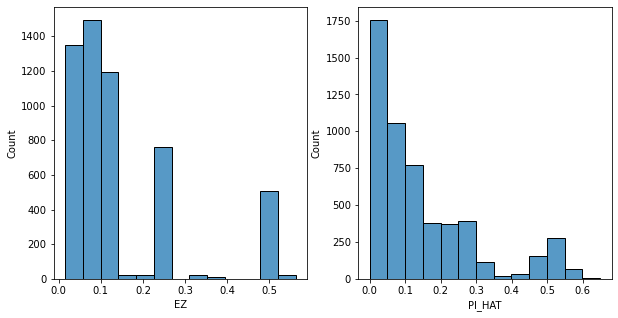

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plt.sca(axes[0])
sns.histplot(data=related, x='EZ', bins=13)
plt.sca(axes[1])
sns.histplot(data=related, x='PI_HAT', bins=13)

<AxesSubplot:xlabel='RT', ylabel='Count'>

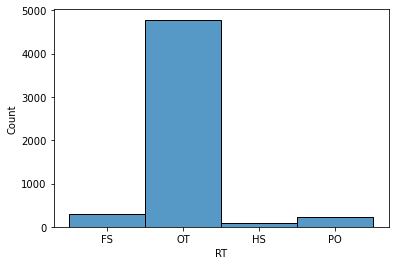

In [20]:
sns.histplot(x=related['RT'])

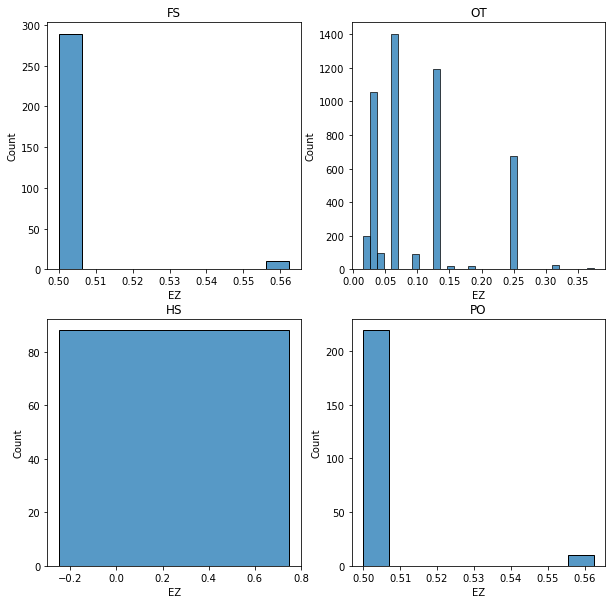

In [24]:
relations = related['RT'].unique()

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for r, ax in zip(relations, axes.ravel()):
    plt.sca(ax)
    plt.title(r)
    sns.histplot(data=related.query(f"RT == '{r}'"), x='EZ')

In [19]:
np.mean((related["EZ"] - related["PI_HAT"])**2)

0.0017346307080710849